In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Data Understanding and Data Loading

In [2]:
boombikes = pd.read_csv('day.csv')

In [3]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# printing total number of rows and columns [i.e shape(rows, columns)]
print(f"Total number of columns: {boombikes.shape[0]}")
print(f"Total number of rows: {boombikes.shape[1]}")

Total number of columns: 730
Total number of rows: 16


In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### After understanding the data dictionary I came to the below conclusions:

- `instant` is just an index number which is not essential for our project. We must drop `instant`
- `dteday` is date which can be non essential for our project, because other variables like `yr`, `mnth`, `weekday`, `workingday` pretty much explains everything about the date. So, we must drop `dteday`
- `holiday` can also be dropped because `weekday` and `workingday` explain everything about holiday. So, we must drop `holiday`
- `temp` and `atemp` both are the temperature variables one being actual temperature and other being feeling temperature. Any one of it should be dropped. I decided to drop `temp` and keep `atemp`
- `casual` and `registered` is also non essential for the project. So, we must drop them

###### Hence here is the list of variables need to be dropped
`instant`, `dteday`, `holiday`, `temp`, `casual`, `registered`

# Preprocessing Steps

#### Lets start our preprocessing by checking null values

In [7]:
boombikes.isnull().sum().sum()

0

No null values. So far so good!!!

#### Let's drop non essential variables

In [8]:
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
list_of_non_essential_cols = ['instant', 'dteday', 'holiday', 'temp', 'casual', 'registered']
boombikes = boombikes.drop(list_of_non_essential_cols, axis=1)
boombikes.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'atemp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Now, its time to have a look into categorical variables

In [10]:
boombikes.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,11.46350,43.6957,12.522300,1600


Here `season`, `yr`, `mnth`, `weekday`, `workingday`, `weathersit` are the only categorical variables so far

#### Lets map all the categorical variables to its actual meaning (looking at data dictionary)

In [11]:
boombikes['season'] = boombikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes['yr'] = boombikes['yr'].map({0:'2018', 1:'2019'})
boombikes['mnth'] = boombikes['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
boombikes['weekday'] = boombikes['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
boombikes['workingday'] = boombikes['workingday'].map({0: 'No', 1: 'Yes'})
boombikes['weathersit'] = boombikes['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

In [17]:
boombikes.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,jan,sat,No,mist,18.18125,80.5833,10.749882,985
1,spring,2018,jan,sun,No,mist,17.68695,69.6087,16.652113,801
2,spring,2018,jan,mon,Yes,clear,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,tue,Yes,clear,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,wed,Yes,clear,11.46350,43.6957,12.522300,1600


# EDA

Now, lets start with EDA.

### Univariate Analysis

In [38]:
numerical_vars = ['atemp', 'hum', 'windspeed', 'cnt']
categorical_vars = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [21]:
boombikes[numerical_vars].describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


Here we can analyse:
- Temperature looks like:
    - Min = 4
    - Max = 42
    - Average = 23
- Humidity looks like:
    - Min = 0
    - Max = 97
    - Average = 62
- Windspeed looks like:
    - Min = 1
    - Max = 34
    - Average = 12
- Count of the total rental bikes looks like:
    - Min = 22
    - Max = 8714
    - Average = 4508

Also other datas like count, median, standard deviation, etc can be seen in the above description

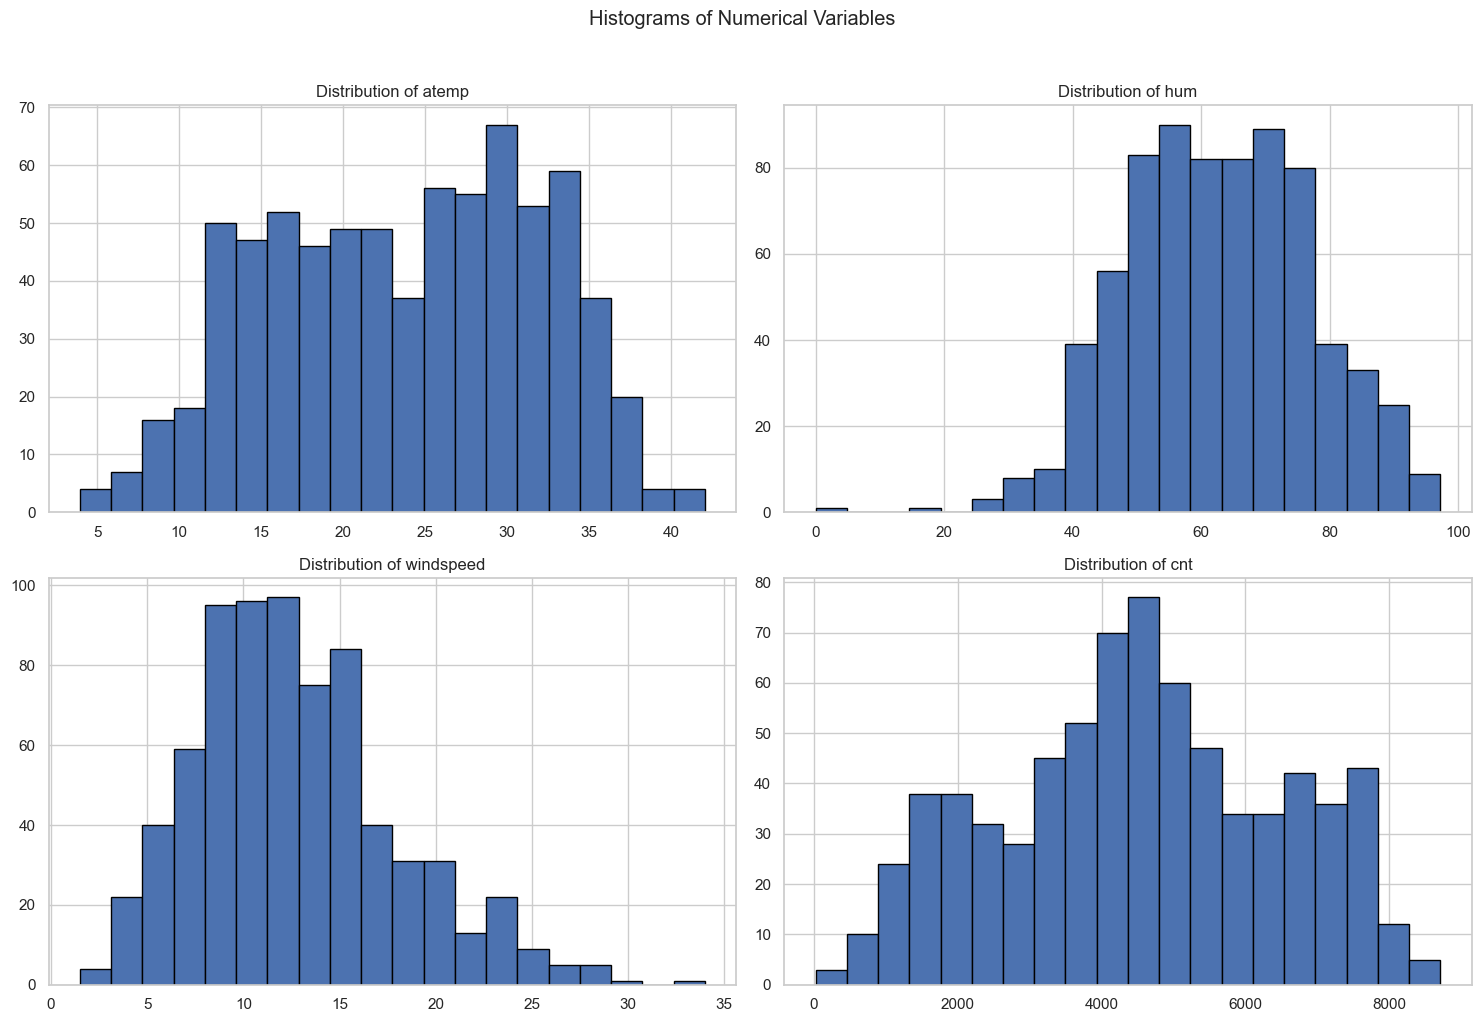

In [28]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    plt.hist(boombikes[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()


Here we can see:
- Temperature is in range 5-40. But, high histogram is in the range 12-37
- Most of the humidity data falls in the range 40-80
- Windspeed in the dataset has more values in the range 5-16
- Whereas count of the vehile is pretty much spread in all the ranges but higher count is somewhere around 4000-5000

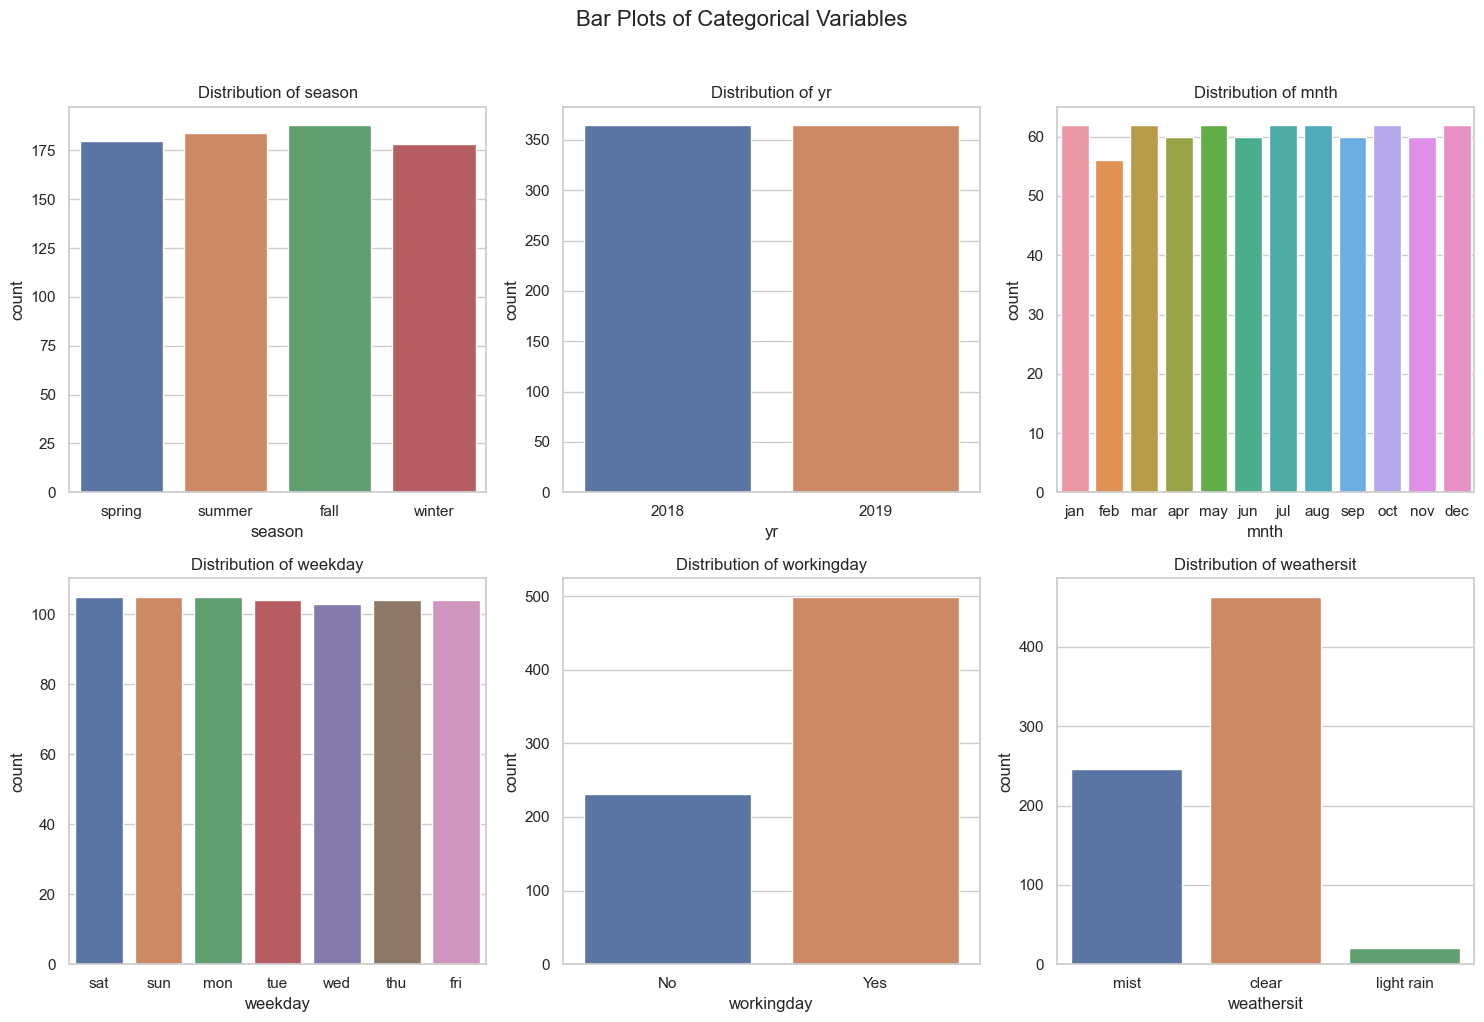

In [32]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=boombikes, x=column)
    plt.title(f'Distribution of {column}')

plt.suptitle('Bar Plots of Categorical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Looking into these subplots we can come have a pretty much spread of our data
- Overal the spread of data for season is pretty much same but still fall(autumn) have little high counts in the dataset
- Both the year 2018 and 2019 have equal counts
- Looking into month, we can say in Feb there was little less booking
- All the day in a week have equally distributed counts in the dataset
- Counts of Working day is more than Non working day; make sense; there are almost 5 working days in a week whereas 2 weekends
- Very less booking on light rain. And there is no booking at all in heavy rain (which was mentioned in data dictionary)

This was just Univariate analysis so, we can't tell much about the actual number of the vehicle booked. Since, we are seeing each variable independently. Now, lets proceed to Bivariate Analysis 

### Bivariate Analysis

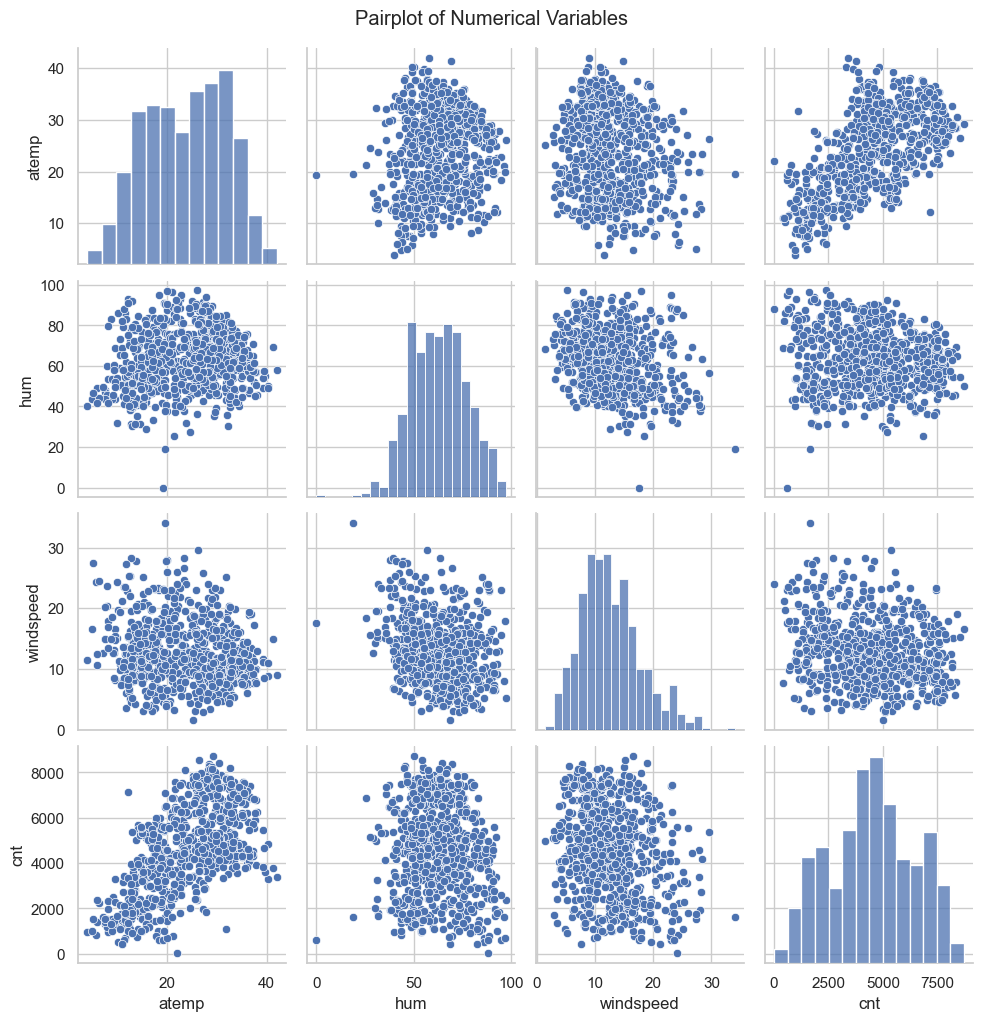

In [37]:
sns.pairplot(boombikes[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

Here we got pretty much information about the numerical variable
- atemp i.e. temperature looks the most linearly correlated to the cnt
- humidity and windspeed doesn't seems to be having linear regression with cnt. But, we can't judge until we calculate R_square.  P_values and VIF. We will look that in further model building section

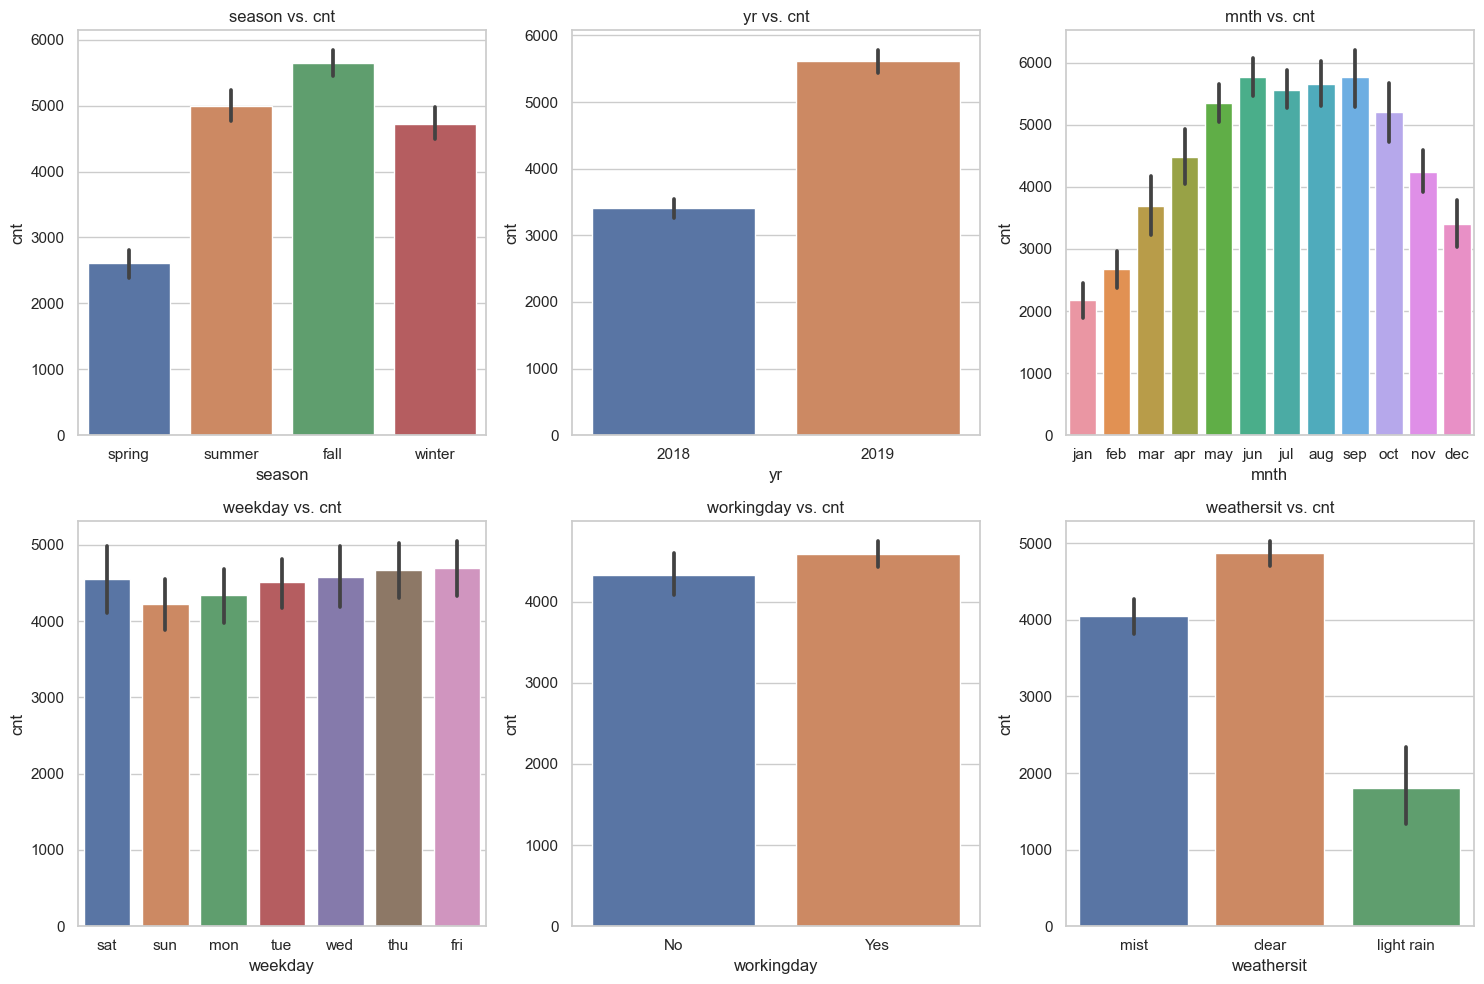

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(categorical_vars):
    row, col = divmod(i, 3)
    sns.barplot(x=column, y='cnt', data=boombikes, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs. cnt')

plt.tight_layout()
plt.show()


We can easily analyse the categorical varibles in following ways:
- Number of booking in fall(autumn) seems to be the most whereas in spring there was the least booking of the bikes
- Now, after evaluating actual count of the booking of the bikes, we can see that in 2019 there was more numbers of booking
- Wow! Jan seems to have least number of booking whereas Jul, Sept seems to have the most number of booking
- Sun have the least number of booking. Maybe on Sunday many people don't need to go to work or school. And Sat have the highest, maybe because after working/studying hard people seems to roam around on Saturday.
- Number of vehicle was booked in Working days seems to be more than that on non working day
- As we saw in univariate analysis, likewise light rain have the least booking, make sense. People don't wanna ride bike on the rainy day

# Dummy Variables

Now, lets get back to the categorical variables again.<br>
We have already mapped the categorical variabels to its actual meaning (looking into the data dictionary)<br>
And we performed the EDA using those mapped values.<br>
Now, lets check for how many of those categorical variables we need to create dummy variables

In [39]:
categorical_vars = ['season', 'yr', 'mnth','weekday','workingday','weathersit']
for var in categorical_vars:
    print(var,"=>",boombikes[var].value_counts().count())

season => 4
yr => 2
mnth => 12
weekday => 7
workingday => 2
weathersit => 3


Here, `yr` and `workingday` have only two categories, so except these variables, creating dummy variables and applying `drop_first` for all other categorical variables

But, wait!!! We remember that for EDA, we needed to map the values of the all the categorical variables to its actual values.<br>
So, lets map `yr` and `workingday` to its own original values

In [40]:
boombikes['yr'] = boombikes['yr'].map({'2018':0, '2019':1})
boombikes['workingday'] = boombikes['workingday'].map({'No':0, 'Yes':0})

In [43]:
boombikes.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'atemp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [44]:
season = pd.get_dummies(boombikes['season'], drop_first = True)
mnth = pd.get_dummies(boombikes['mnth'], drop_first = True)
weekday = pd.get_dummies(boombikes['weekday'], drop_first = True)
weathersit = pd.get_dummies(boombikes['weathersit'], drop_first = True)

boombikes = pd.concat([boombikes, season, mnth, weekday, weathersit], axis = 1)
boombikes.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,spring,0,jan,sat,0,mist,18.18125,80.5833,10.749882,985,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,sun,0,mist,17.68695,69.6087,16.652113,801,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,mon,0,clear,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,tue,0,clear,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,wed,0,clear,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
boombikes.

In [18]:
boombikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
boombikes.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
boombikes.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'light rain', 'mist'],
      dtype='object')

# Train-Test Split

In [ ]:
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the features

In [ ]:
boombikes.head()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to numerical columns
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

# Feature Selection

### Automated (RFE)

In [ ]:
lm = LinearRegression() 
lm.fit(X_train, y_train) 

rfe = RFE(lm, n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col_using = X_train.columns[rfe.support_]
col_using

In [ ]:
col_dropping = X_train.columns[~rfe.support_]
col_dropping

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col_using]

In [ ]:
# Adding a constant variable 
X_train = sm.add_constant(X_train)

In [ ]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train = X_train.drop(["hum"], axis = 1)
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Rebuilding the model without `sat`

In [ ]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train_original,X_train_lm).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
X_train_new.columns

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
%matplotlib inline

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# cutoff of pvalue = 0.05
# cutoff of VIF is 5

# Model Building

In [ ]:
#####

# Model Evaluation

### Applying the scaling on the test sets

In [ ]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test.columns

In [ ]:
X_train.columns

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

In [ ]:
# Making predictions
y_pred_test = lm.predict(X_test)

In [ ]:
y_pred_train = lm.predict(X_train)

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label

## Calculating R2 value and Adjusted R2 value

### For Train

In [ ]:


# Calculating R-squared for train data
r2_train = r2_score(y_train, y_pred_train)
print(f'R-squared (Train): {r2_train}')

# Calculating Adjusted R-squared for train data using statsmodels
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_intercept).fit()
adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f'Adjusted R-squared (Train): {adjusted_r2_train}')

### For Test

In [ ]:

# Calculating R-squared for test data
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared (Test): {r2_test}')


# Calculating Adjusted R-squared for test data using statsmodels
X_test_with_intercept = sm.add_constant(X_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Adjusted R-squared (Test): {adjusted_r2_test}')